# Tests of the  $\texttt{gw_remnant}$ package package

## Test 1: Compare with surrkick

Our first test will compare the output of $\texttt{gw_remnant}$ with [surrkick](https://github.com/dgerosa/surrkick). 

As of 1/25/2023, surrkick only runs under Python2 and the only supported model is [NRSur7dq2](https://pypi.org/project/NRSur7dq2/). And so the first task -- *using Python2* -- will be to compute surrkick data and save it to a file. We will then use this data for comparing with $\texttt{gw_remnant}$.

To setup the Python 2.7 environment do

```bash
conda create --name py27 python=2.7 anaconda
conada activate py27
pip install surrkick
pip uninstall parmap
pip install parmap==1.5.2
```

### Generate testing data from surrkick

WARNING: run all cells in this section with a Python 2.7 kernel

In [5]:
import surrkick
import numpy as np

vk/c= 0.0037988369852118447


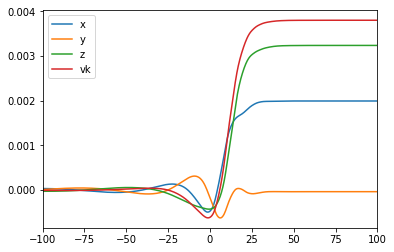

In [6]:
# Test that surrick is working
# Compare figure to the one at the bottom of this page: https://github.com/dgerosa/surrkick
import matplotlib.pyplot as plt

sk=surrkick.surrkick(q=0.5,chi1=[0.8,0,0],
    chi2=[-0.8,0,0])
print 'vk/c=', sk.kick
plt.plot(sk.times,sk.voft[:,0],label='x')
plt.plot(sk.times,sk.voft[:,1],label='y')
plt.plot(sk.times,sk.voft[:,2],label='z')
plt.plot(sk.times,surrkick.project(sk.voft,
    sk.kickdir),label='vk')
plt.xlim(-100,100)
plt.legend()
plt.show()

In [4]:
# Generate testing data and save it to file
q_test = 2.0
chi1_test = [0.0,0,0]
chi2_test = [0.0,0,0]

In [20]:
# Generate testing data and save it to file
sk=surrkick.surrkick(q=1.0/q_test,chi1=chi1_test, chi2=chi2_test)

np.save("dEdt.npy", sk.dEdt, allow_pickle=False, fix_imports=False)
np.save("Eoft.npy", sk.Eoft, allow_pickle=False, fix_imports=False)
np.save("Moft.npy", sk.Moft, allow_pickle=False, fix_imports=False)

np.save("dPdt.npy", sk.dPdt, allow_pickle=False, fix_imports=False)
np.save("Poft.npy", sk.Poft, allow_pickle=False, fix_imports=False)
np.save("voft.npy", sk.voft, allow_pickle=False, fix_imports=False)

np.save("Joft.npy", sk.Joft, allow_pickle=False, fix_imports=False)
np.save("dJdt.npy", sk.dJdt, allow_pickle=False, fix_imports=False)

np.save("times.npy", sk.times, allow_pickle=False, fix_imports=False)

# the model's ell_max is 4
for ell in [2,3,4]:
    for emm in range(-ell,ell+1):
        np.save("h_%i_%i.npy"%(ell,emm), sk.h(ell,emm), allow_pickle=False, fix_imports=False)

In [21]:
# print important values
print("Erad = %.16f"%sk.Erad)
print("Mfin = %.16f"%sk.Mfin)
print("Prad = %.16e"%sk.Prad)
print("Kick = %.16e"%sk.kick)
print("Jrad = %.16e"%sk.Jrad)

Erad = 0.0389092138344656
Mfin = 0.9613628355659223
Prad = 4.7806722135870056e-04
Kick = 4.9380380097232982e-04
Jrad = 3.9445591363377880e-01


### Compare surrkick to $\texttt{gw_remnant}$

WARNING: run all cells in this section with a Python 3.X kernel

After saving the numpy data to file, restart the kernel using Python3. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sys
path_to_gwremnant = "/home/UMDAR.UMASSD.EDU/tislam/work/final_repos/gw_remnant/"
path_to_gwremnant = "/home/balzani57/Repo/GitRepos/Codes/gw_remnant"
sys.path.append(path_to_gwremnant)
import gw_remnant
from gw_remnant.gw_remnant_calculator import GWRemnantCalculator

In [10]:
# Load testing data from surrkick
dEdt_surrkick = np.load("dEdt.npy")
Eoft_surrkick = np.load("Eoft.npy")
Moft_surrkick = np.load("Moft.npy")

dPdt_surrkick = np.load("dPdt.npy")
dPdt_surrkick = dPdt_surrkick.transpose()
Poft_surrkick = np.load("Poft.npy")
Poft_surrkick = Poft_surrkick.transpose()
voft_surrkick = np.load("voft.npy")
voft_surrkick = voft_surrkick.transpose()

Joft_surrkick = np.load("Joft.npy")
dJdt_surrkick = np.load("dJdt.npy")
dJdt_surrkick = dJdt_surrkick.transpose()

times_surrkick = np.load("times.npy")

h_surrkick = {}
for ell in [2,3,4]:
    for emm in range(-ell,ell+1):
        h_temp = np.load("h_%i_%i.npy"%(ell,emm))
        h_surrkick[(ell,emm)] = h_temp

In [5]:
# compute remnant quantities from surrkick's h
remnant = GWRemnantCalculator(time=times_surrkick, hdict=h_surrkick, qinput=q_test)

Mass ratio : 2.000
Initial mass : 1.00000000 M
Total enery radiated : 0.03869332 M
Peak luminosity : 0.00077364 
Remnant mass : 0.96274808 M
Remnant spin (dimensionless) : 0.85152486 M
Remnant kick velocity : 0.00049601 c


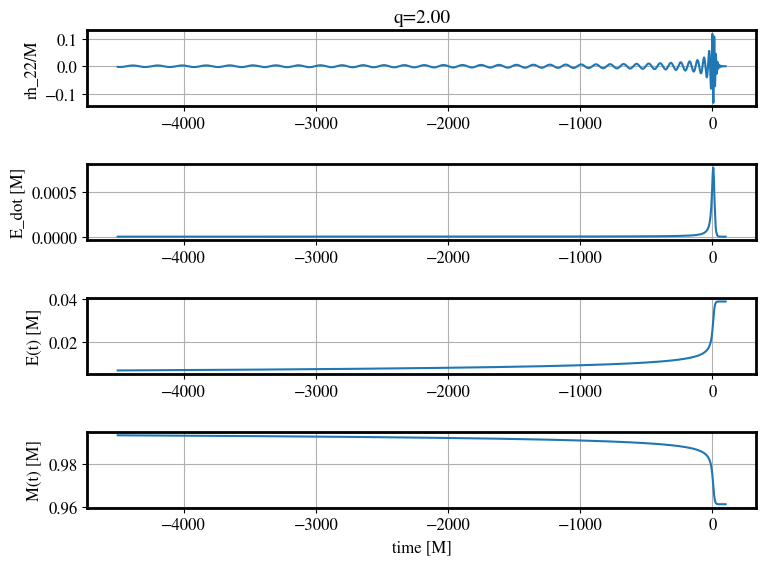

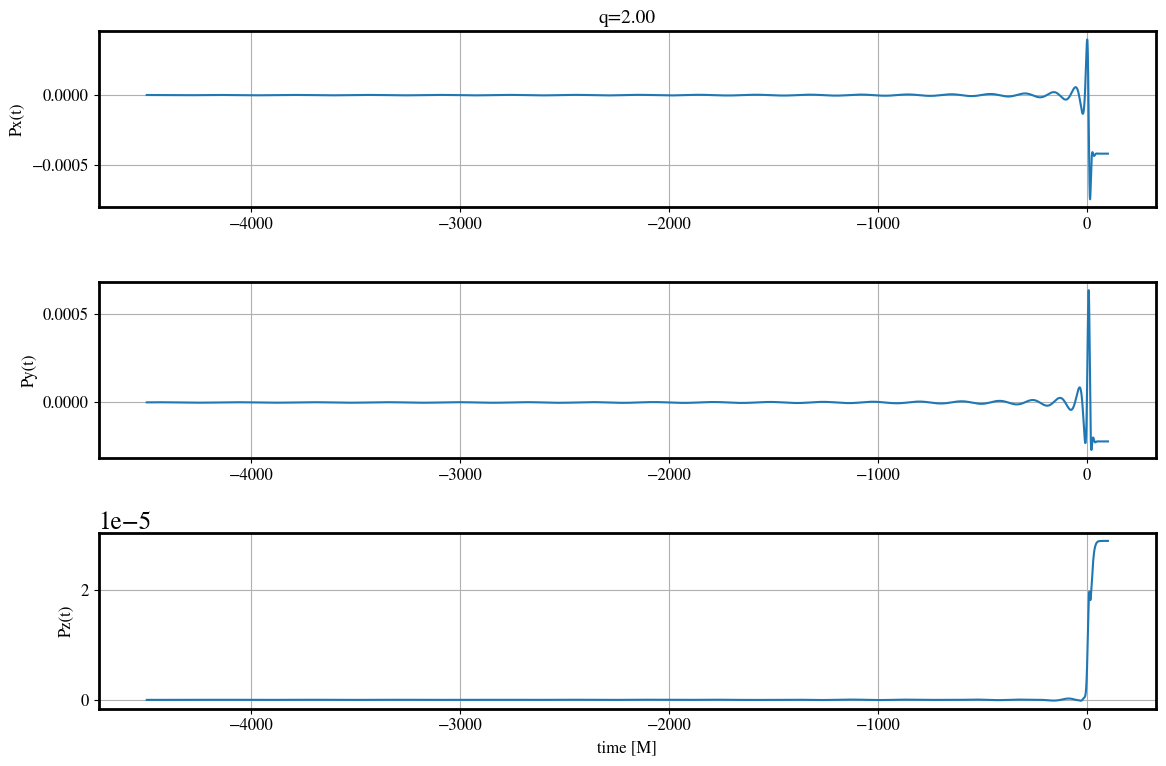

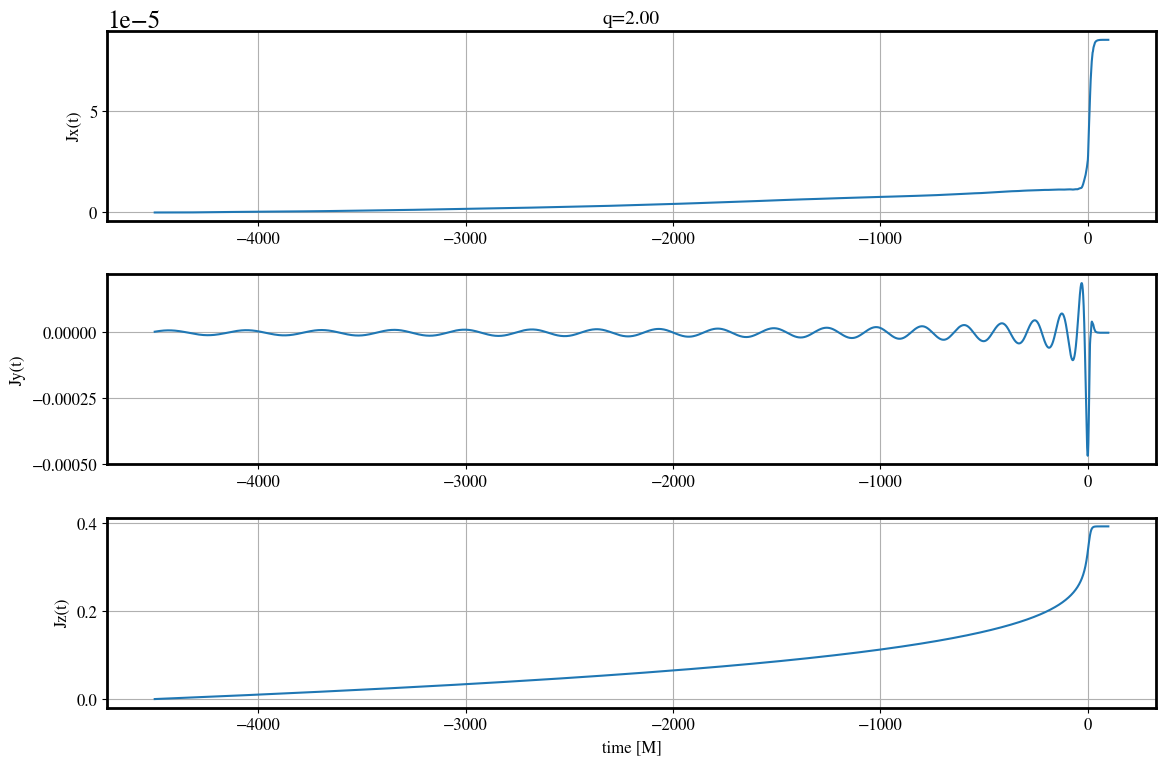

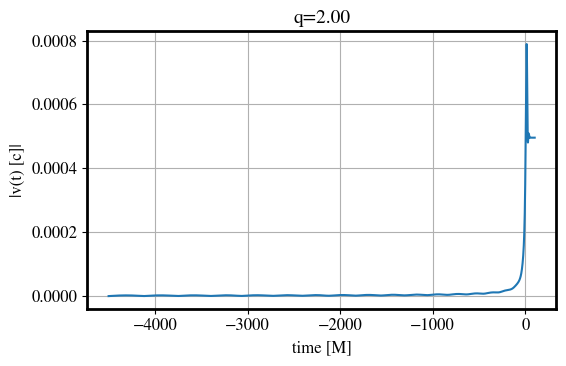

In [6]:
# report remnant information
remnant.print_remnants()
remnant.plot_mass_energy()
remnant.plot_linear_momentum()
remnant.plot_angular_momentum()
remnant.plot_kick_velocity()

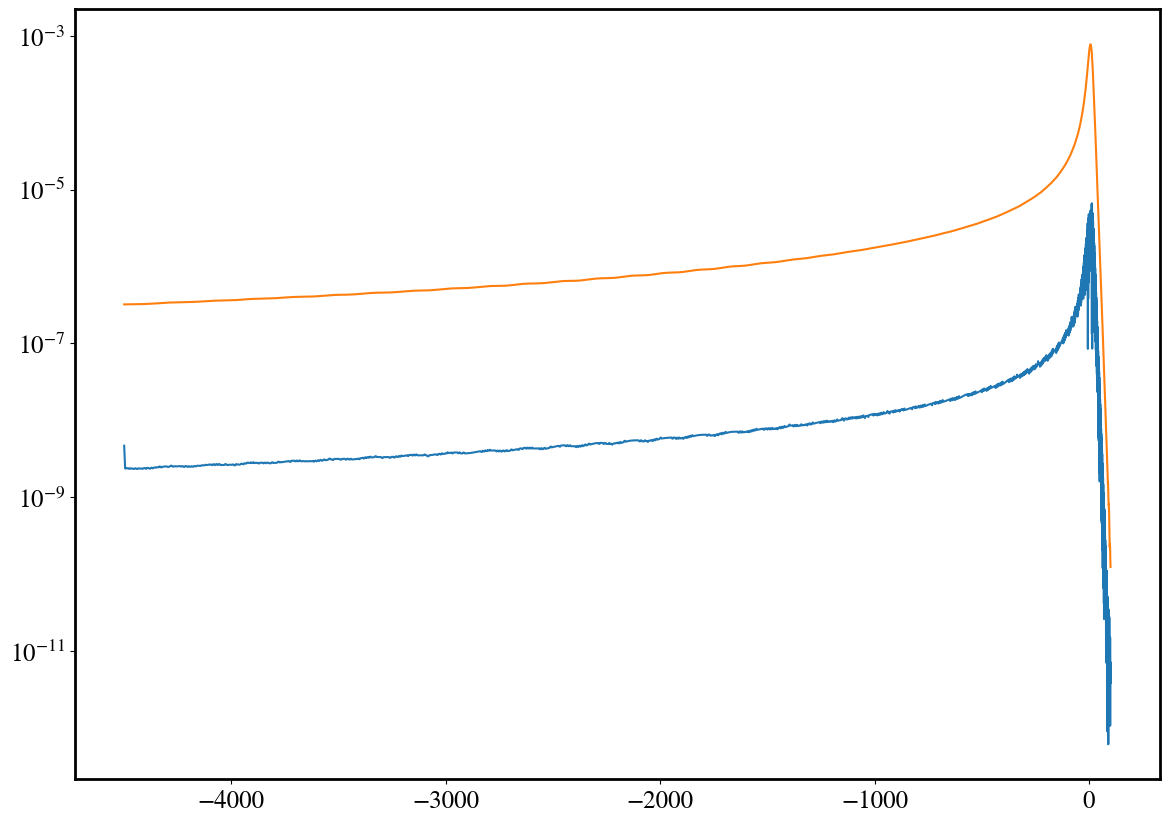

In [21]:
# compare surrkick to gw-remnant: E_dot
plt.semilogy(times_surrkick, np.abs(remnant.E_dot - dEdt_surrkick))
plt.semilogy(times_surrkick, np.abs(dEdt_surrkick))

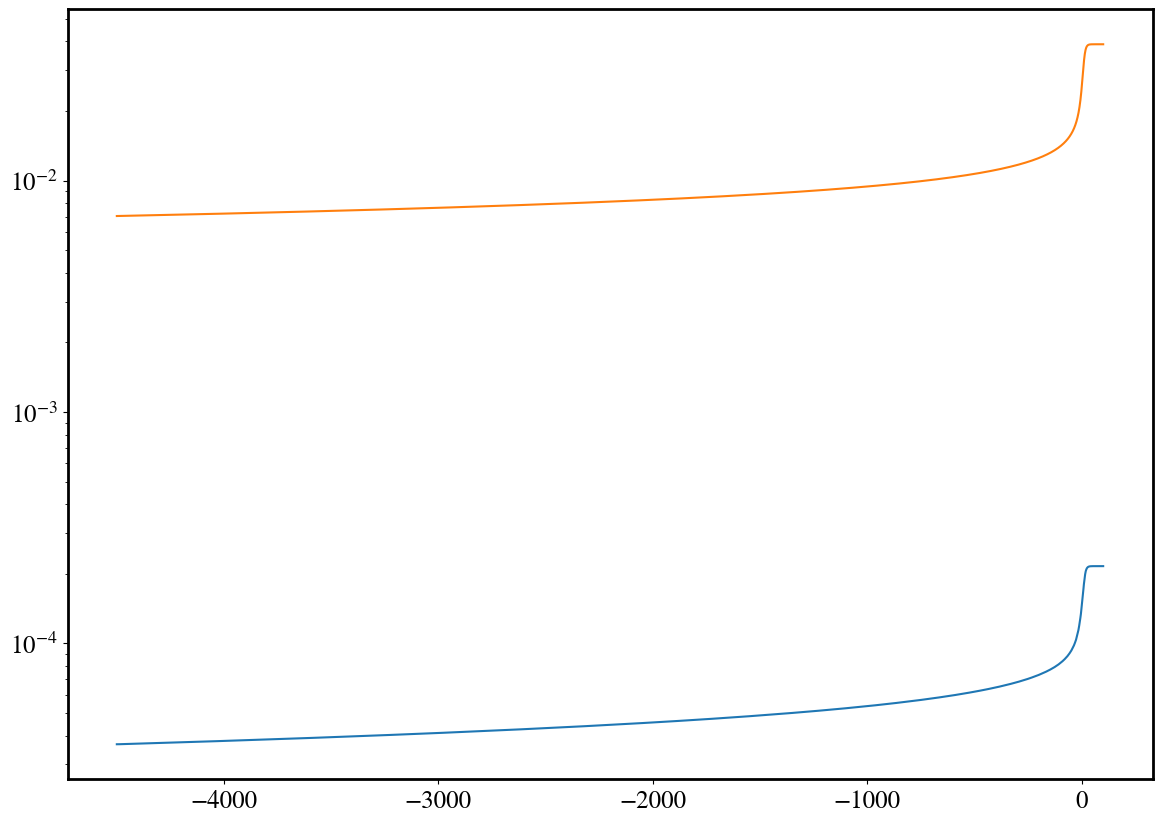

In [22]:
# compare surrkick to gw-remnant: Eoft
plt.semilogy(times_surrkick, np.abs(remnant.Eoft - Eoft_surrkick))
plt.semilogy(times_surrkick, np.abs(Eoft_surrkick))

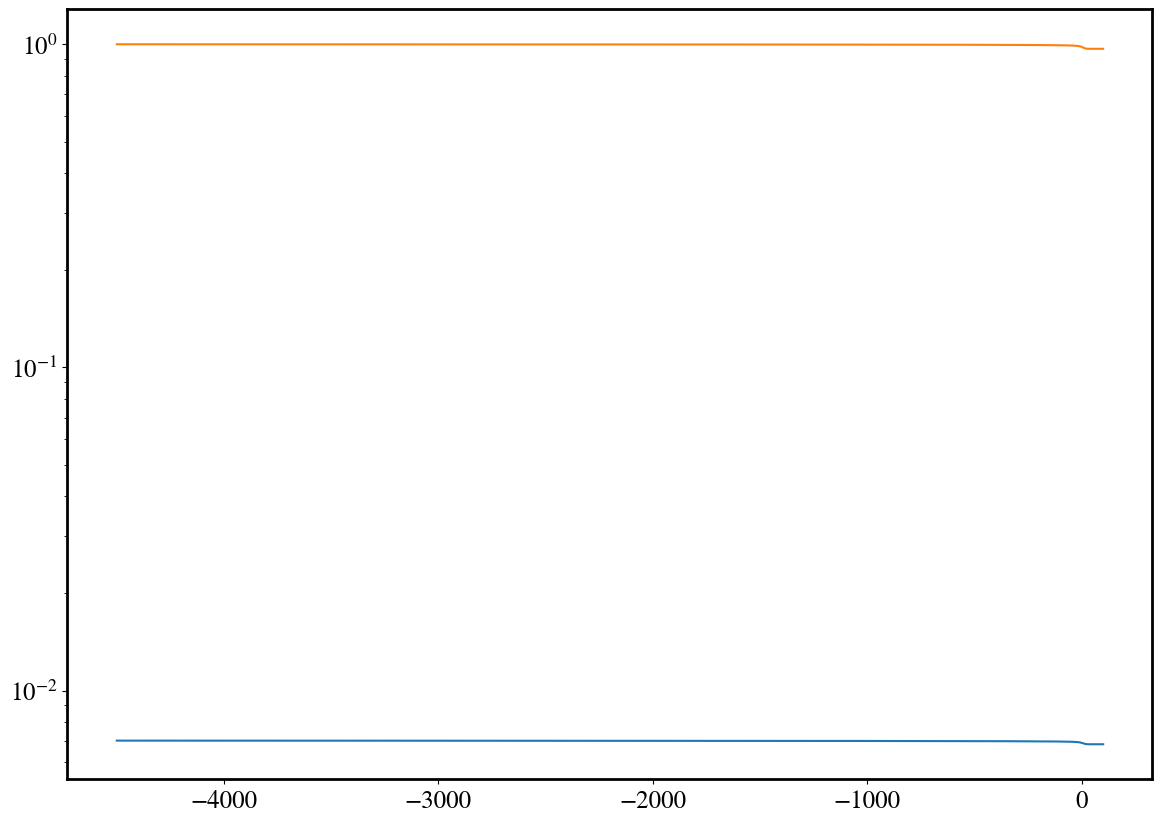

In [23]:
# compare surrkick to gw-remnant: Moft
plt.semilogy(times_surrkick, np.abs(remnant.Moft - Moft_surrkick))
plt.semilogy(times_surrkick, np.abs(Moft_surrkick))

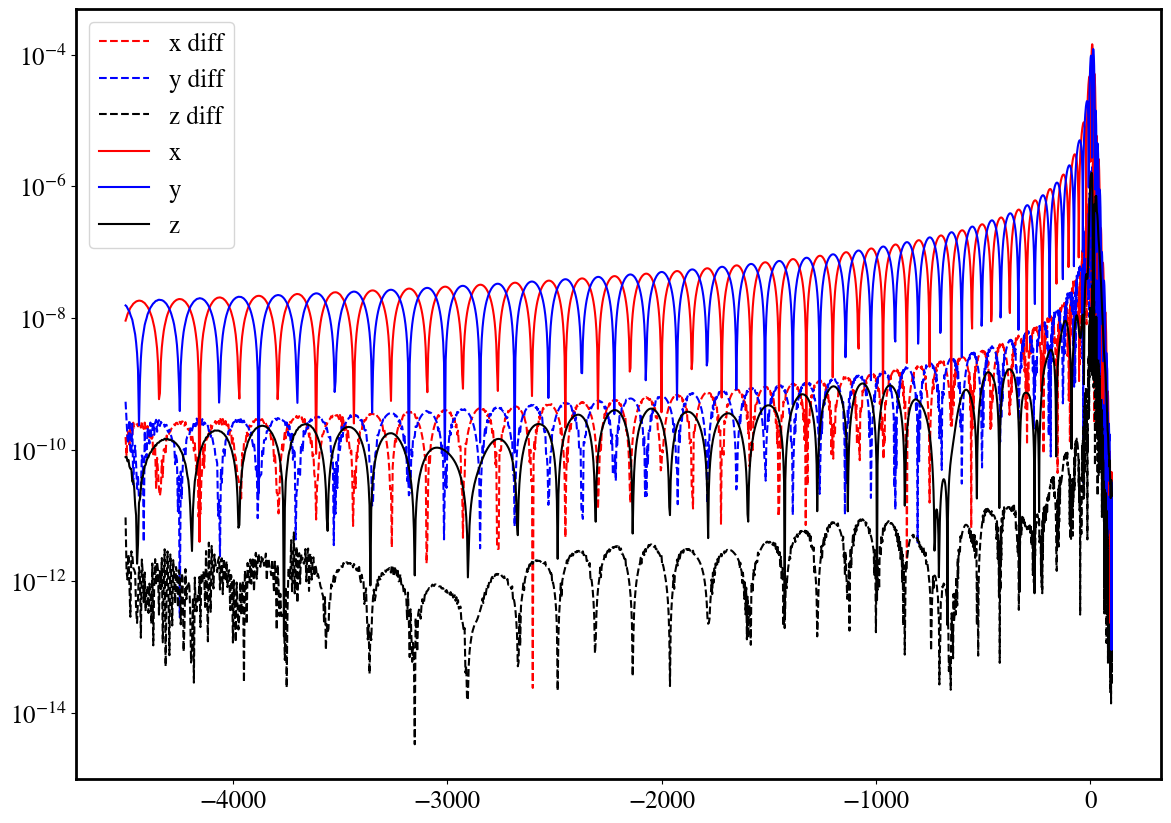

In [16]:
# compare surrkick to gw-remnant: P_dot
diff = np.abs(remnant.P_dot - dPdt_surrkick)
plt.semilogy(times_surrkick, diff[0],'r--',label='x diff')
plt.semilogy(times_surrkick, diff[1],'b--',label='y diff')
plt.semilogy(times_surrkick, diff[2],'k--',label='z diff')
plt.semilogy(times_surrkick, np.abs(dPdt_surrkick)[0],'r', label='x')
plt.semilogy(times_surrkick, np.abs(dPdt_surrkick)[1],'b', label='y')
plt.semilogy(times_surrkick, np.abs(dPdt_surrkick)[2],'k', label='z')
plt.legend()

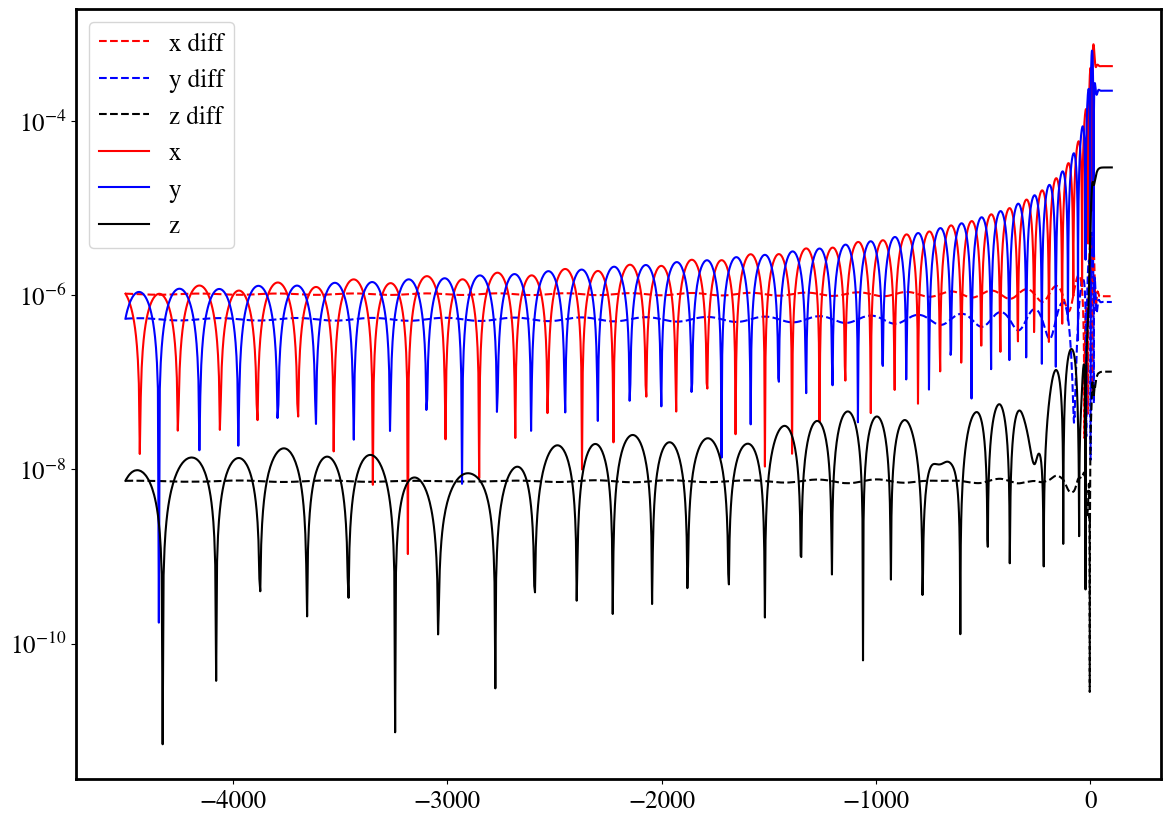

In [17]:
# compare surrkick to gw-remnant: Poft
diff = np.abs(remnant.Poft - Poft_surrkick)
plt.semilogy(times_surrkick, diff[0],'r--',label='x diff' )
plt.semilogy(times_surrkick, diff[1],'b--',label='y diff' )
plt.semilogy(times_surrkick, diff[2],'k--',label='z diff' )
plt.semilogy(times_surrkick, np.abs(Poft_surrkick)[0],'r',label='x')
plt.semilogy(times_surrkick, np.abs(Poft_surrkick)[1],'b',label='y')
plt.semilogy(times_surrkick, np.abs(Poft_surrkick)[2],'k',label='z')
plt.legend()

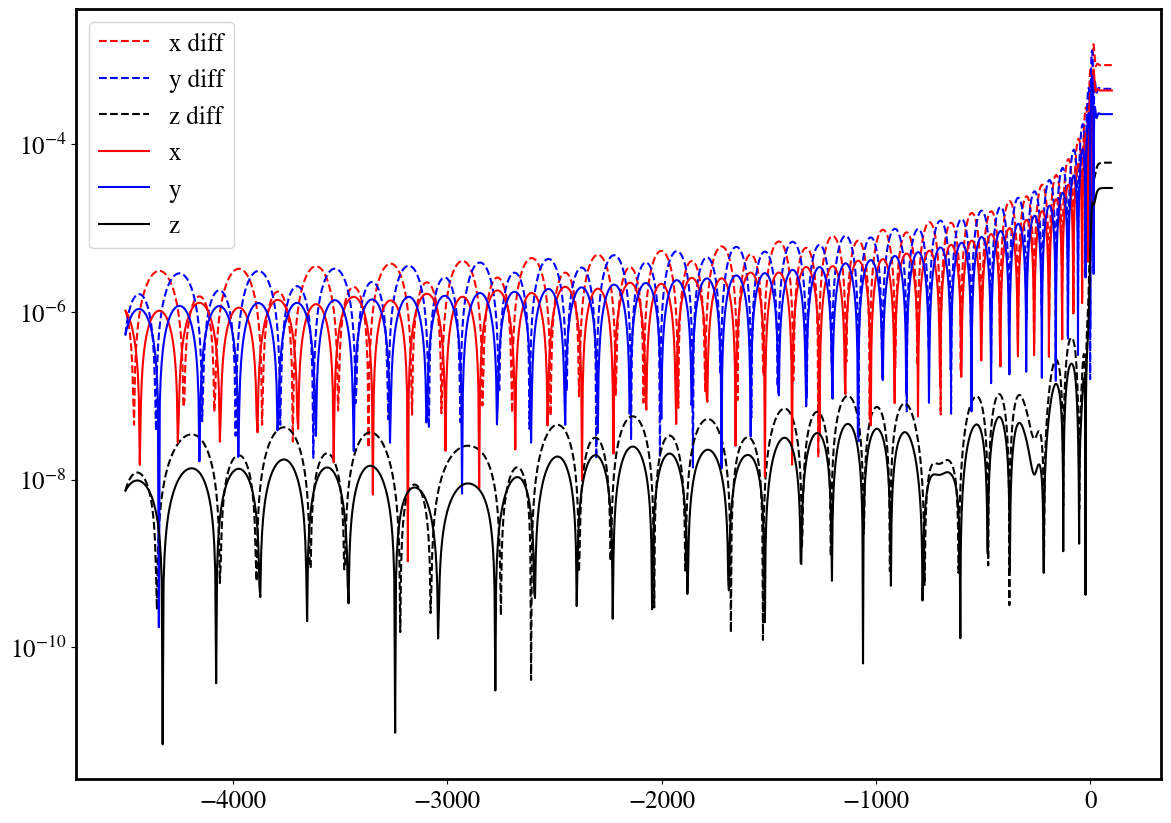

In [18]:
# compare surrkick to gw-remnant: voft_surrkick
diff = np.abs(remnant.voft.transpose() - voft_surrkick)
plt.semilogy(times_surrkick, diff[0],'r--',label='x diff' )
plt.semilogy(times_surrkick, diff[1],'b--',label='y diff' )
plt.semilogy(times_surrkick, diff[2],'k--',label='z diff' )
plt.semilogy(times_surrkick, np.abs(voft_surrkick)[0],'r',label='x')
plt.semilogy(times_surrkick, np.abs(voft_surrkick)[1],'b',label='y')
plt.semilogy(times_surrkick, np.abs(voft_surrkick)[2],'k',label='z')
plt.legend()

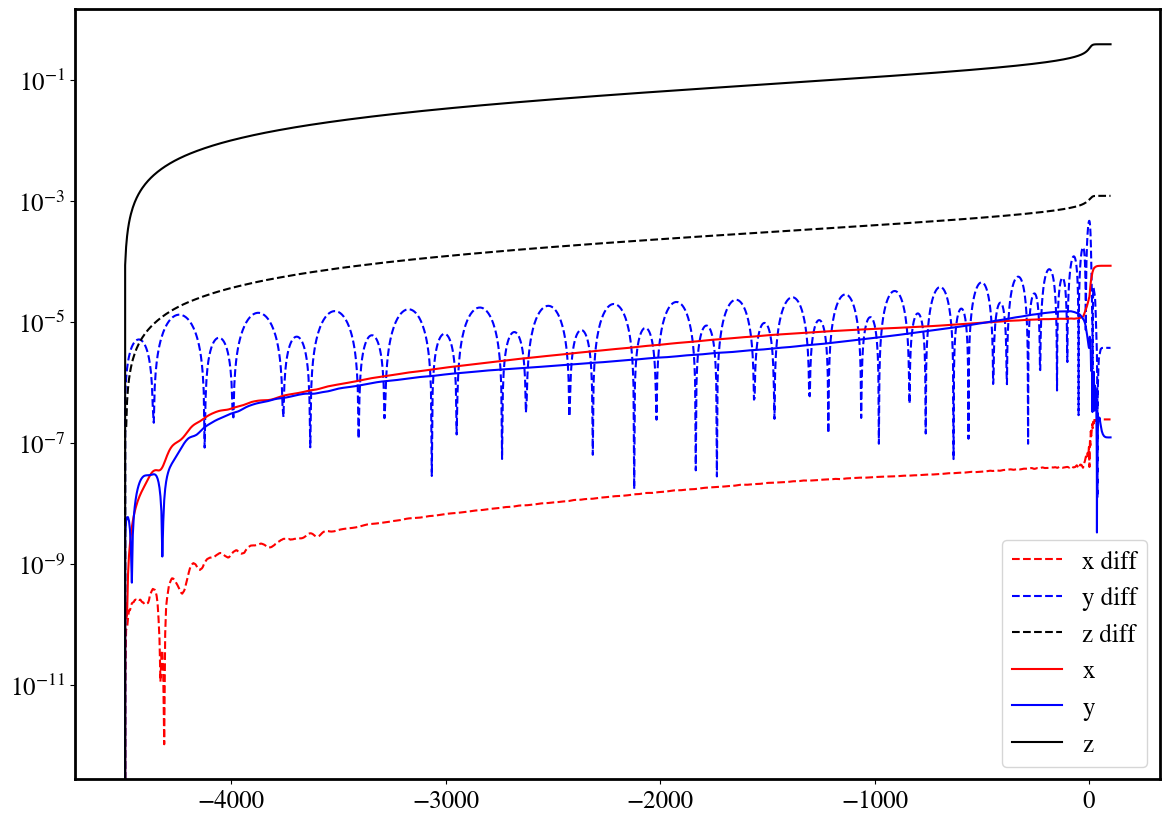

In [19]:
# compare surrkick to gw-remnant: Joft_surrkick
diff = np.abs(remnant.Joft - Joft_surrkick.transpose())
plt.semilogy(times_surrkick, diff[0],'r--',label='x diff' )
plt.semilogy(times_surrkick, diff[1],'b--',label='y diff' )
plt.semilogy(times_surrkick, diff[2],'k--',label='z diff' )
plt.semilogy(times_surrkick, np.abs(Joft_surrkick.transpose())[0],'r',label='x')
plt.semilogy(times_surrkick, np.abs(Joft_surrkick.transpose())[1],'b',label='y')
plt.semilogy(times_surrkick, np.abs(Joft_surrkick.transpose())[2],'k',label='z')
plt.legend()

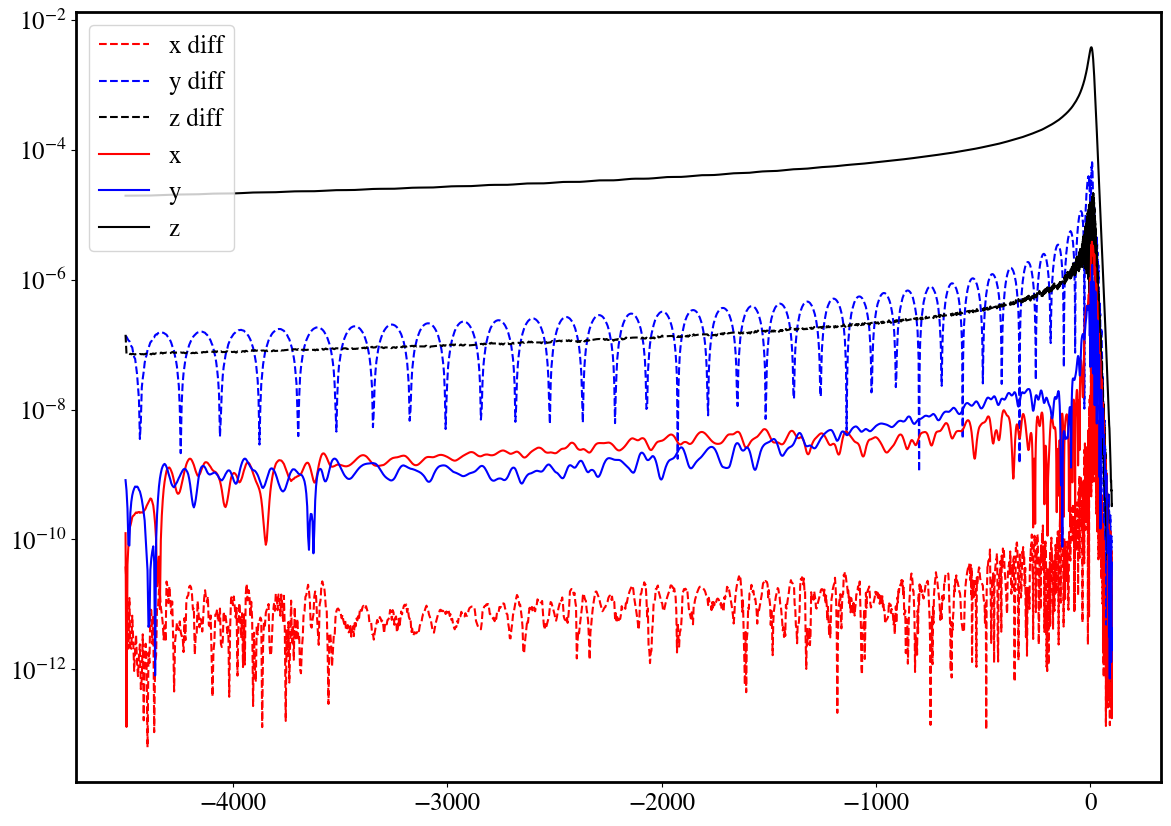

In [20]:
# compare surrkick to gw-remnant: dJdt_surrkick
diff = np.abs(remnant.J_dot - dJdt_surrkick)
plt.semilogy(times_surrkick, diff[0],'r--',label='x diff' )
plt.semilogy(times_surrkick, diff[1],'b--',label='y diff' )
plt.semilogy(times_surrkick, diff[2],'k--',label='z diff' )
plt.semilogy(times_surrkick, np.abs(dJdt_surrkick[0]),'r',label='x')
plt.semilogy(times_surrkick, np.abs(dJdt_surrkick[1]),'b',label='y')
plt.semilogy(times_surrkick, np.abs(dJdt_surrkick[2]),'k',label='z')
plt.legend()